In [131]:
!pip install graphviz

In [132]:
import pandas as pd
import numpy as np

from foursquare import fetch_venue_categories

from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.decomposition import NMF
# from sklearn.metrics import mean_squared_error #explained_variance_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import graphviz

In [59]:
venue_counts = pd.read_csv('data/counted_world_venues.csv', index_col=0)
venue_counts.fillna(0, inplace=True)
venue_counts.set_index('City', drop=True, inplace=True)
venue_counts

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zhejiang Restaurant,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи."""
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Makasar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
venue_counts.dtype = int

In [61]:
venue_counts

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zhejiang Restaurant,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи."""
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Makasar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# categories = pd.read_csv('data/')

categories = fetch_venue_categories()
categories_df = pd.DataFrame(categories)
categories_df

url https://api.foursquare.com/v2/venues/categories?client_id=5YWYDD1OYF3I3QYJMUFJX3O1UDV5MU4NCBI30FYK4YHMGWQ4&client_secret=LFUHV1IDE4KESRNAONHO1YX42CCC5GICZ112WKKL3HHJ2PGU&v=20180605
{'categories': [{'id': '4d4b7104d754a06370d81259', 'name': 'Arts & Entertainment', 'pluralName': 'Arts & Entertainment', 'shortName': 'Arts & Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'categories': [{'id': '56aa371be4b08b9a8d5734db', 'name': 'Amphitheater', 'pluralName': 'Amphitheaters', 'shortName': 'Amphitheater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'categories': []}, {'id': '4fceea171983d5d06c3e9823', 'name': 'Aquarium', 'pluralName': 'Aquariums', 'shortName': 'Aquarium', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_', 'suffix': '.png'}, 'categories': []}, {'id': '4bf58dd8d48988d1e1931735', 'name': 'Arcade', 

,name,category
0,Amphitheater,Arts & Entertainment
1,Aquarium,Arts & Entertainment
2,Arcade,Arts & Entertainment
3,Art Gallery,Arts & Entertainment
4,Bowling Alley,Arts & Entertainment
...,...,...
926,Train Station,Travel & Transport
927,Tram Station,Travel & Transport
928,Transportation Service,Travel & Transport
929,Travel Lounge,Travel & Transport


In [45]:
features = list(venue_counts.columns)

def no_metacategory(v):
    return v not in list(categories_df.name)\
        and v not in list(categories_df.category)

drop_cols = filter(no_metacategory, features)
drop_cols

In [46]:
columns = list(drop_cols)

In [47]:
venue_counts.drop(columns=columns)

,ATM,Acai House,Accessories Store,Acehnese Restaurant,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,...,Yakitori Restaurant,Yemeni Restaurant,Yoga Studio,Yoshoku Restaurant,Yucatecan Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit,Çöp Şiş Place
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,46.0,NaN,22.0,NaN,NaN,3.0,1.0,17.0,15.0,NaN,...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Tangerang,1.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Casablanca,NaN,NaN,3.0,NaN,NaN,NaN,NaN,17.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Cairo,3.0,NaN,NaN,NaN,NaN,NaN,3.0,19.0,1.0,NaN,...,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phoenix,8.0,NaN,7.0,NaN,NaN,1.0,NaN,2.0,2.0,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,NaN,NaN,1.0,NaN,NaN,NaN,1.0,7.0,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bogotá,9.0,NaN,16.0,NaN,2.0,NaN,1.0,47.0,NaN,NaN,...,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Makasar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
metacategories = categories_df.category.unique()
metacategories

array(['Arts & Entertainment', 'College & University', 'Event', 'Food',
       'Nightlife Spot', 'Outdoors & Recreation',
       'Professional & Other Places', 'Residence', 'Shop & Service',
       'Travel & Transport'], dtype=object)

In [64]:
for m in metacategories:
    venue_counts[m]=sum([c in venue_counts.columns and venue_counts[c] for c in list(categories_df[categories_df.category==m].name)])

venue_counts

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""",Event
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
Makasar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
[c not in metacategories and venue_counts.drop(c, axis=1, inplace=True) for c in venue_counts.columns]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 False,
 None,
 None,
 None,
 None,
 None

In [88]:
metacategory_counts = venue_counts.astype(int)
metacategory_counts

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Event
City,,,,,,,,,,
Bangalore,323,375,4218,357,741,2751,866,3589,880,1
Tangerang,136,246,1022,70,273,1097,218,663,139,1
Casablanca,121,50,1113,122,148,666,91,595,195,1
Cairo,114,196,811,89,199,975,173,678,260,1
Phoenix,166,105,747,163,610,1584,199,1557,372,0
...,...,...,...,...,...,...,...,...,...,...
Munich,63,88,435,78,238,935,42,728,361,1
Bogotá,461,500,3750,576,881,3187,1205,2826,496,7
Makasar,31,37,222,13,51,215,22,106,79,0


In [89]:
metacategory_counts.to_csv('data/metacategory_counts.csv')

In [90]:
metacategory_freq = metacategory_counts.div(metacategory_counts.sum(axis=1), axis=0)
metacategory_freq

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Event
City,,,,,,,,,,
Bangalore,0.022906,0.026594,0.299128,0.025317,0.052549,0.195093,0.061414,0.254521,0.062407,0.000071
Tangerang,0.035188,0.063648,0.264424,0.018111,0.070634,0.283829,0.056404,0.171539,0.035964,0.000259
Casablanca,0.039007,0.016119,0.358801,0.039329,0.047711,0.214700,0.029336,0.191812,0.062863,0.000322
Cairo,0.032609,0.056064,0.231979,0.025458,0.056922,0.278890,0.049485,0.193936,0.074371,0.000286
Phoenix,0.030165,0.019081,0.135744,0.029620,0.110849,0.287843,0.036162,0.282937,0.067599,0.000000
...,...,...,...,...,...,...,...,...,...,...
Munich,0.021219,0.029640,0.146514,0.026271,0.080162,0.314921,0.014146,0.245200,0.121590,0.000337
Bogotá,0.033192,0.036000,0.269998,0.041472,0.063431,0.229462,0.086759,0.203470,0.035712,0.000504
Makasar,0.039948,0.047680,0.286082,0.016753,0.065722,0.277062,0.028351,0.136598,0.101804,0.000000


In [91]:
metacategory_freq.to_csv('data/metacategory_freq.csv')

In [100]:
ratings = pd.read_csv('data/cities_ratings.csv', index_col=0)
ratings.set_index('Centre', drop=True, inplace=True)
ratings

,Rating
Centre,
New York City,790
London,773
Hong Kong,771
Singapore,762
Shanghai,761
...,...
Athens,539
Dalian,529
Tianjin,528


In [137]:
meta = metacategory_freq.join(ratings)
meta

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Event,Rating
City,,,,,,,,,,,
Bangalore,0.022906,0.026594,0.299128,0.025317,0.052549,0.195093,0.061414,0.254521,0.062407,0.000071,NaN
Tangerang,0.035188,0.063648,0.264424,0.018111,0.070634,0.283829,0.056404,0.171539,0.035964,0.000259,NaN
Casablanca,0.039007,0.016119,0.358801,0.039329,0.047711,0.214700,0.029336,0.191812,0.062863,0.000322,714.0
Cairo,0.032609,0.056064,0.231979,0.025458,0.056922,0.278890,0.049485,0.193936,0.074371,0.000286,NaN
Phoenix,0.030165,0.019081,0.135744,0.029620,0.110849,0.287843,0.036162,0.282937,0.067599,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.021219,0.029640,0.146514,0.026271,0.080162,0.314921,0.014146,0.245200,0.121590,0.000337,645.0
Bogotá,0.033192,0.036000,0.269998,0.041472,0.063431,0.229462,0.086759,0.203470,0.035712,0.000504,NaN
Makasar,0.039948,0.047680,0.286082,0.016753,0.065722,0.277062,0.028351,0.136598,0.101804,0.000000,NaN


In [145]:
# meta['is_top_city'] = meta.Rating>700

def get_rank(rating):
    if rating > 700:
        return 'HIGH' 
    if rating > 0:
        return 'MID'
    return 'LOW'

meta['rank'] = meta.Rating.apply(get_rank).astype('category')
# meta.drop(['is_top_city'], axis=1, inplace=True)
meta

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Event,Rating,rank
City,,,,,,,,,,,,
Bangalore,0.022906,0.026594,0.299128,0.025317,0.052549,0.195093,0.061414,0.254521,0.062407,0.000071,NaN,LOW
Tangerang,0.035188,0.063648,0.264424,0.018111,0.070634,0.283829,0.056404,0.171539,0.035964,0.000259,NaN,LOW
Casablanca,0.039007,0.016119,0.358801,0.039329,0.047711,0.214700,0.029336,0.191812,0.062863,0.000322,714.0,HIGH
Cairo,0.032609,0.056064,0.231979,0.025458,0.056922,0.278890,0.049485,0.193936,0.074371,0.000286,NaN,LOW
Phoenix,0.030165,0.019081,0.135744,0.029620,0.110849,0.287843,0.036162,0.282937,0.067599,0.000000,NaN,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.021219,0.029640,0.146514,0.026271,0.080162,0.314921,0.014146,0.245200,0.121590,0.000337,645.0,MID
Bogotá,0.033192,0.036000,0.269998,0.041472,0.063431,0.229462,0.086759,0.203470,0.035712,0.000504,NaN,LOW
Makasar,0.039948,0.047680,0.286082,0.016753,0.065722,0.277062,0.028351,0.136598,0.101804,0.000000,NaN,LOW


[Text(127.43051470588236, 209.07692307692307, 'X[0] <= 0.032\ngini = 0.667\nsamples = 250\nvalue = [83.333, 83.333, 83.333]'),
 Text(79.87058823529412, 192.35076923076923, 'X[7] <= 0.231\ngini = 0.607\nsamples = 100\nvalue = [14.881, 31.25, 47.043]'),
 Text(41.576470588235296, 175.62461538461537, 'X[7] <= 0.131\ngini = 0.569\nsamples = 57\nvalue = [11.905, 13.542, 36.29]'),
 Text(17.50588235294118, 158.89846153846153, 'X[3] <= 0.022\ngini = 0.569\nsamples = 13\nvalue = [2.976, 5.729, 1.344]'),
 Text(8.75294117647059, 142.1723076923077, 'X[2] <= 0.275\ngini = 0.254\nsamples = 2\nvalue = [2.976, 0.521, 0.0]'),
 Text(4.376470588235295, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 0.521, 0.0]'),
 Text(13.129411764705884, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [2.976, 0.0, 0.0]'),
 Text(26.258823529411767, 142.1723076923077, 'X[5] <= 0.148\ngini = 0.326\nsamples = 11\nvalue = [0.0, 5.208, 1.344]'),
 Text(21.88235294117647, 125.44615384615385, 'gini = 0.0\nsampl

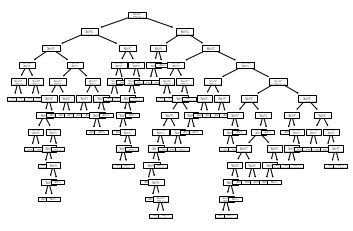

In [148]:
X = meta.iloc[:,:-2]
y = meta["rank"]

# folds = KFold(n_splits=5)
# train_scores = []
# test_scores = []
# features = []
# components = []

# for train_index, test_index in folds.split(X):
#     print('train_index', train_index)
#     print('test_index', test_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
classifier = tree.DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train, y_train)

X_test_predicted = classifier.predict(X_test)
#     X_test_proba = classifier.predict_proba(X_test)

# classifier.score(X_test_predicted, y_test)
tree.plot_tree(classifier.fit(X, y))

In [129]:
classifier.score(X_test_predicted, y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [149]:
confusion_matrix(y_test, X_test_predicted)

array([[ 1,  6,  5],
       [ 5, 38, 12],
       [ 2,  9,  5]])

In [150]:
print(classification_report(y_test, X_test_predicted))

              precision    recall  f1-score   support

        HIGH       0.12      0.08      0.10        12
         LOW       0.72      0.69      0.70        55
         MID       0.23      0.31      0.26        16

    accuracy                           0.53        83
   macro avg       0.36      0.36      0.36        83
weighted avg       0.54      0.53      0.53        83



In [151]:
meta["rank"].unique()

[LOW, HIGH, MID]
Categories (3, object): [LOW, HIGH, MID]

In [152]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                      feature_names=meta.columns[:-2],  
                      class_names=meta["rank"].unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(dot_data)  
graph

Error: not well-formed (invalid token) in line 1 
... <HTML>Arts & Entertainment &le; 0.032 ...
in label of node 0
Error: not well-formed (invalid token) in line 1 
... <HTML>Shop & Service &le; 0.231 ...
in label of node 1
Error: not well-formed (invalid token) in line 1 
... <HTML>Shop & Service &le; 0.131 ...
in label of node 2
Error: not well-formed (invalid token) in line 1 
... <HTML>Professional & Other Places &le; 0.148 ...
in label of node 7
Error: not well-formed (invalid token) in line 1 
... <HTML>Professional & Other Places &le; 0.23 ...
in label of node 10
Error: not well-formed (invalid token) in line 1 
... <HTML>Professional & Other Places &le; 0.17 ...
in label of node 13
Error: not well-formed (invalid token) in line 1 
... <HTML>Travel & Transport &le; 0.201 ...
in label of node 14
Error: not well-formed (invalid token) in line 1 
... <HTML>Professional & Other Places &le; 0.219 ...
in label of node 17
Error: not well-formed (invalid token) in line 1 
... <HTML>Prof

CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1. [stderr: b'Error: not well-formed (invalid token) in line 1 \n... <HTML>Arts & Entertainment &le; 0.032 ...\nin label of node 0\nError: not well-formed (invalid token) in line 1 \n... <HTML>Shop & Service &le; 0.231 ...\nin label of node 1\nError: not well-formed (invalid token) in line 1 \n... <HTML>Shop & Service &le; 0.131 ...\nin label of node 2\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.148 ...\nin label of node 7\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.23 ...\nin label of node 10\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.17 ...\nin label of node 13\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.201 ...\nin label of node 14\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.219 ...\nin label of node 17\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.206 ...\nin label of node 21\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.064 ...\nin label of node 30\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.046 ...\nin label of node 31\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.033 ...\nin label of node 35\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.242 ...\nin label of node 39\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.161 ...\nin label of node 40\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.042 ...\nin label of node 41\nError: not well-formed (invalid token) in line 1 \n... <HTML>College & University &le; 0.048 ...\nin label of node 45\nError: not well-formed (invalid token) in line 1 \n... <HTML>Arts & Entertainment &le; 0.029 ...\nin label of node 47\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.029 ...\nin label of node 48\nError: not well-formed (invalid token) in line 1 \n... <HTML>Arts & Entertainment &le; 0.018 ...\nin label of node 50\nError: not well-formed (invalid token) in line 1 \n... <HTML>Shop & Service &le; 0.137 ...\nin label of node 58\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.149 ...\nin label of node 60\nError: not well-formed (invalid token) in line 1 \n... <HTML>College & University &le; 0.026 ...\nin label of node 64\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.307 ...\nin label of node 66\nError: not well-formed (invalid token) in line 1 \n... <HTML>Shop & Service &le; 0.293 ...\nin label of node 70\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.136 ...\nin label of node 71\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.135 ...\nin label of node 72\nError: not well-formed (invalid token) in line 1 \n... <HTML>Arts & Entertainment &le; 0.032 ...\nin label of node 74\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.24 ...\nin label of node 76\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.107 ...\nin label of node 78\nError: not well-formed (invalid token) in line 1 \n... <HTML>Shop & Service &le; 0.165 ...\nin label of node 90\nError: not well-formed (invalid token) in line 1 \n... <HTML>College & University &le; 0.033 ...\nin label of node 91\nError: not well-formed (invalid token) in line 1 \n... <HTML>Arts & Entertainment &le; 0.049 ...\nin label of node 92\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.124 ...\nin label of node 95\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.106 ...\nin label of node 98\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.051 ...\nin label of node 100\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.05 ...\nin label of node 101\nError: not well-formed (invalid token) in line 1 \n... <HTML>Arts & Entertainment &le; 0.051 ...\nin label of node 105\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.265 ...\nin label of node 107\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.087 ...\nin label of node 108\nError: not well-formed (invalid token) in line 1 \n... <HTML>Outdoors & Recreation &le; 0.063 ...\nin label of node 109\nError: not well-formed (invalid token) in line 1 \n... <HTML>Professional & Other Places &le; 0.315 ...\nin label of node 115\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.032 ...\nin label of node 118\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.062 ...\nin label of node 125\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.119 ...\nin label of node 127\nError: not well-formed (invalid token) in line 1 \n... <HTML>College & University &le; 0.028 ...\nin label of node 128\nError: not well-formed (invalid token) in line 1 \n... <HTML>Shop & Service &le; 0.205 ...\nin label of node 132\nError: not well-formed (invalid token) in line 1 \n... <HTML>College & University &le; 0.027 ...\nin label of node 136\nError: not well-formed (invalid token) in line 1 \n... <HTML>Travel & Transport &le; 0.049 ...\nin label of node 138\n']